In [122]:
import pandas as pd


In [123]:
df = pd.read_csv('/content/imigrantes_canada.csv')

In [124]:
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [126]:
df.set_index('País', inplace=True)

# Realização de tratamentos
Vamos começar com a primeira tarefa desse projeto que é: analisar as tendências de imigração do Brasil ao longo dos anos.

Para fazer isso, vamos alterar o index do nosso dataframe para ser o país. Assim, poderemos acessar só o Brasil e extrair informações desse país.

In [127]:
#vamos criar uma variável para armazenar o intervalo de tempo de 1980 até 2013. Isso irá facilitar muito na visualização dos dados.
anos = list(map(str, range(1980, 2014)))

In [128]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [129]:
#Agora, queremos pegar somente os dados do Brasil. Podemos usar a propriedade loc do Pandas para fazer isso,
# pois essa propriedade consegue pegar rótulos específicos dentro de um dataframe.

brasil = df.loc['Brasil', anos]

In [130]:
brasil

,Brasil
1980,211
1981,220
1982,192
1983,139
1984,145
1985,130
1986,205
1987,244
1988,394
1989,650




---


Temos uma series com os anos de 1980 a 2013 na primeira coluna e o número de imigrantes na segunda. Podemos transformar esses dados em um dataframe. Para fazer essa conversão, vamos criar um dicionário onde daremos um nome para cada uma das colunas: ano e número de imigrantes.

In [131]:
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [132]:
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


# Criando o primeiro gráfico com Matplotlib

In [133]:
import matplotlib.pyplot as plt

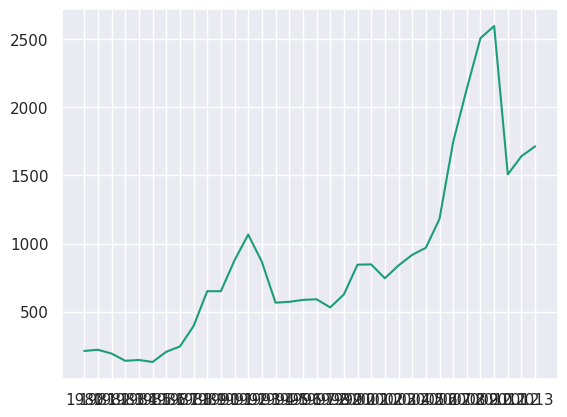

In [134]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])

([<matplotlib.axis.XTick at 0x7db105ec2bd0>,
 [Text(0.0, 0, '1980'),
  Text(5.0, 0, '1985'),
  Text(10.0, 0, '1990'),
  Text(15.0, 0, '1995'),
  Text(20.0, 0, '2000'),
  Text(25.0, 0, '2005'),
  Text(30.0, 0, '2010')])

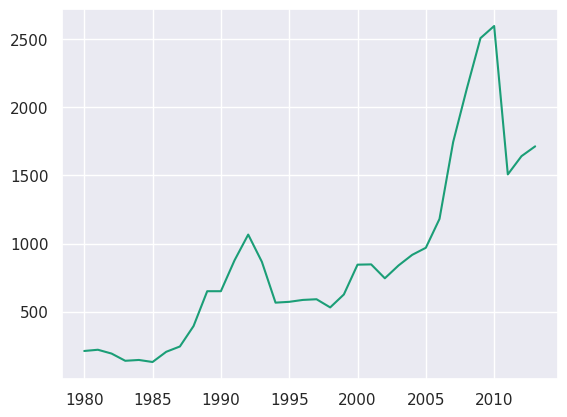

In [135]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])

([<matplotlib.axis.YTick at 0x7db105d79510>,
 [Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000')])

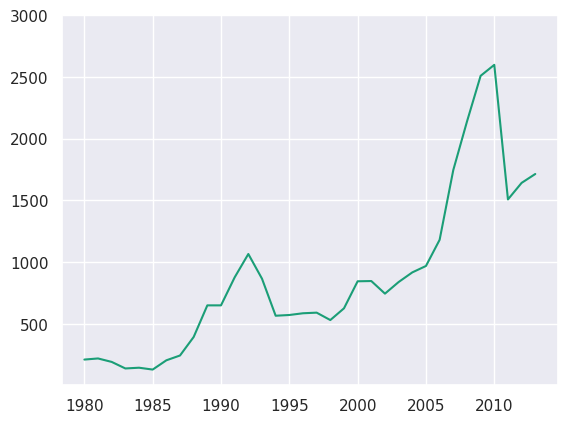

In [136]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])

Ao executar os códigos de plotagem, apareceram alguns textos em cima do gráfico:

([<matplotlib.axis.XTick at 0x7fae010db160>, <matplotlib.axis.XTick at 0x7fae010db130>, <matplotlib.axis.XTick at 0x7fae0398feb0>, <matplotlib.axis.XTick at 0x7fae01098370>, <matplotlib.axis.XTick at 0x7fae01098e20>, <matplotlib.axis.XTick at 0x7fae0109d910>, <matplotlib.axis.XTick at 0x7fae010986a0>],

[Text(0.0, 0, '1980'), Text(5.0, 0, '1985'), Text(10.0, 0, '1990'), Text(15.0, 0, '1995'), Text(20.0, 0, '2000'), Text(25.0, 0, '2005'), Text(30.0, 0, '2010')])

Nesse texto, temos várias informações como tipo de objeto, lugar em que estão armazenados na memória. Isso é comum quando criamos gráficos de plotagem no Python.

Mas, para esses dados não apareçam, podemos usar uma função do Matplotlib chamada show() que faz com que apenas o gráfico seja exibido.

# OBS: Sempre que você for usar o plt.show(), tenha certeza que seja a última linha do seu código. Visto que nada mais será executado depois dessa linha

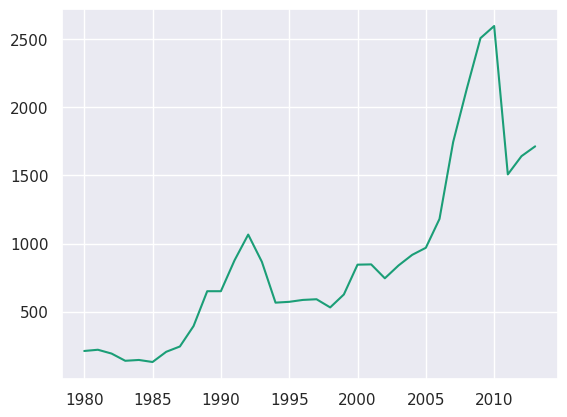

In [137]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

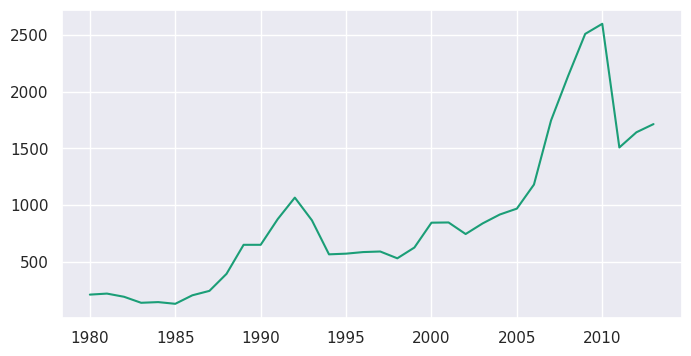

In [138]:
plt.figure(figsize=(8,4)) # para alterar a largura e altura
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

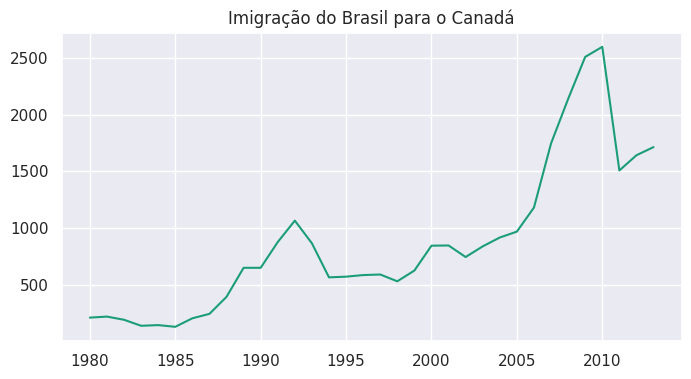

In [139]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá') # adiciona um título ao gráfico
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

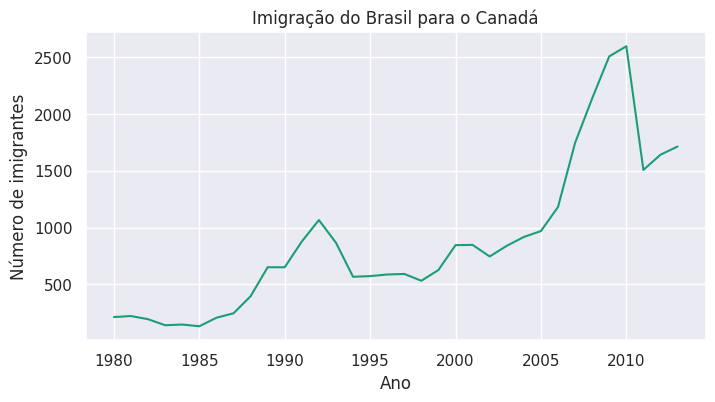

In [140]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá')
plt.xlabel('Ano') #adiciona rotulo ao eixo x
plt.ylabel('Número de imigrantes') #adiciona rotulo ao eixo y
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

# Desafio: comparando tendências de imigração

Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Nós criamos um gráfico com a função plt.plot() para analisar as intrigantes tendências de imigração do Brasil para o Canadá, no período de 1980 a 2013. Neste momento temos uma nova demanda: criar um gráfico de linhas comparando os números de imigrantes do Brasil e Argentina para o Canadá, que são os maiores países da América do Sul.

Prepare-se para um mergulho fascinante nas linhas que conectam esses países da América do Sul ao território canadense. Nessa missão, a elaboração desse gráfico pode ser útil para a compreensão das tendências migratórias desses países para o Canadá ao longo do tempo e como elas se comparam entre si. Ao analisar esses fatores, podemos obter uma visão mais abrangente do cenário migratório na América do Sul.

Fique tranquila(o)!

Essa nova tarefa é mais desafiadora, pois exige uma análise comparativa entre dois países. No entanto, ela também permitirá com que você obtenha uma aprendizagem enriquecedora. Por isso, explore as diversas possibilidades e lembre-se dos elementos essenciais de um gráfico: título, rótulos nos eixos x e y e os ticks do eixo x, que devem ser definidos de 5 em 5 anos.

Além disso, você precisará descobrir como adicionar uma legenda para que seja possível identificar a linha de cada país. Ao seguir essas orientações, você terá construído um gráfico robusto que te permitirá uma análise significativa e aprofundada.

Após criar o gráfico analise o resultado obtido e reflita nas seguintes questões:

Há alguma tendência ou padrão comum nos dados dos dois países?
Quais são os períodos com maior número de imigrantes nos dois países?

In [141]:
# Importando a bliblioteca
import pandas as pd
#selecionando a origem dos dados e salvando na variável
dataframebrasilargentina = pd.read_csv('/content/imigrantes_canada.csv')
dataframebrasilargentina

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [142]:
# transformando a coluna país em indice para ser usada em buscas
dataframebrasilargentina.set_index('País', inplace=True)
# criando uma variável para armazenar a lista de anos do intervalo
anos = list(map(str, range(1980, 2014)))
# selecionando os países e armazenando na variavel países
paises = dataframebrasilargentina.loc[['Brasil', 'Argentina'], anos]
#visualizando o dataframe
paises


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
País,,,,,,,,,,,,,,,,,,,,,
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282


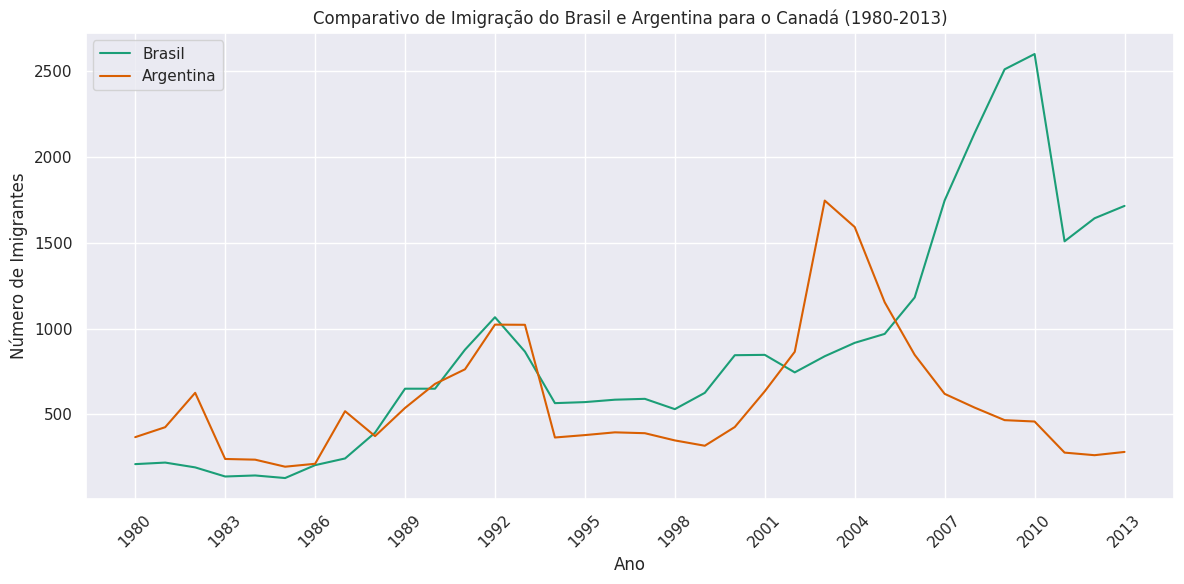

In [143]:
# transpondo o DataFrame para facilitar o gráfico
paises_transposto = paises.transpose() # salva os dados no dataframe
paises_transposto.index.name = 'Ano'  # nomeando o índice (anos)
paises_transposto.columns.name = 'País'  # nomeando as colunas (países)

# criando o gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) # configura o tamanho do gráfico
plt.plot(paises_transposto.index, paises_transposto['Brasil'], label='Brasil')
plt.plot(paises_transposto.index, paises_transposto['Argentina'], label='Argentina')
plt.title('Comparativo de Imigração do Brasil e Argentina para o Canadá (1980-2013)')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.xticks(['1980', '1983', '1986', '1989', '1992', '1995','1998','2001','2004','2007','2010','2013'], rotation=45)
plt.legend() # exibe legenda
plt.grid(True) # exibe grade
plt.tight_layout() #ajusta automaticamente os elementos do gráfico (como título, legendas, rótulos dos eixos)
plt.show() # oculta dados de refrencia ao local da memória salvo e Exibe o gráfico na tela

# Criando uma figura

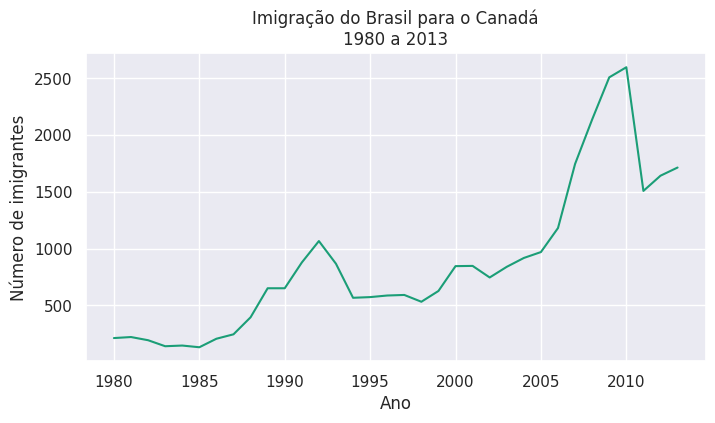

In [144]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

# Criando subplots em uma direção

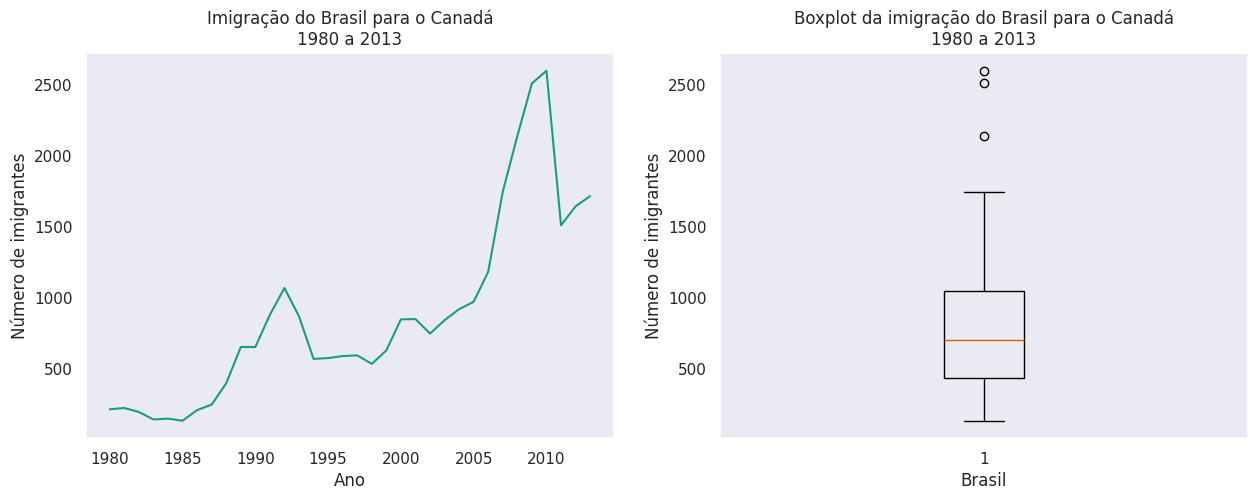

In [145]:
# para criar dois graficos em uma mesma figura.
#criando o primeiro gráfico
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()


plt.show()

In [146]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


# Criando subplots em duas direções #1

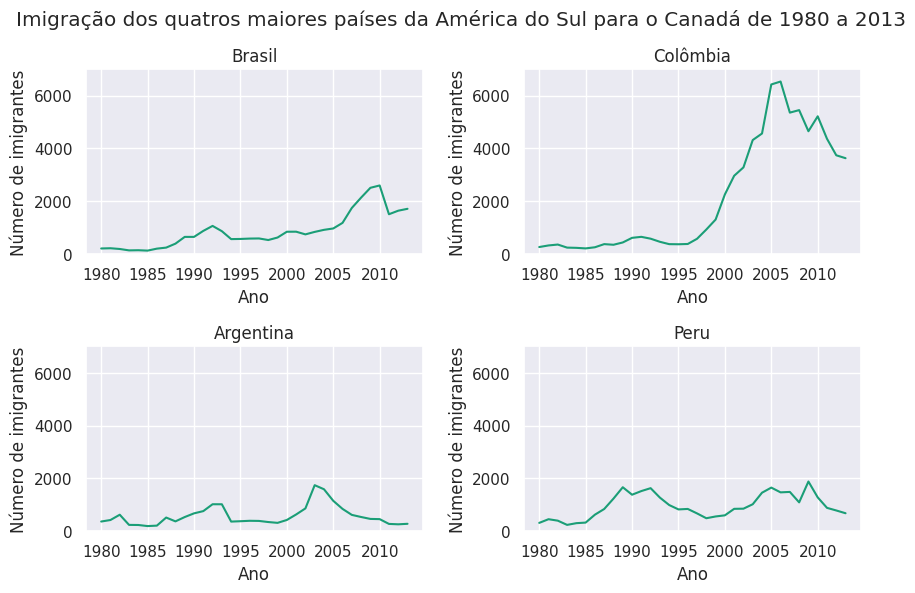

In [147]:
#criando a figura e os subplots
fig, axs = plt.subplots(2,2, figsize=(10,6))
#para adicionar espaço entre os graficos
fig.subplots_adjust(hspace=0.5, wspace=0.3)
#adicionando um título geral para os gráficos
fig.suptitle('Imigração dos quatros maiores países da América do Sul para o Canadá de 1980 a 2013')
# para ajustar o eixo x em todos os graficos
for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

#criando o subplot brasil
axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

# criando o subplot colombia
axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

# criando o subplot Argentina
axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

# criando o subplot Peru
axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

#criando label para todos
for ax in axs.flat:
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de imigrantes')

# criando a mesma escala de valores no eixo y
ymin = 0
ymax = 7000
for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

plt.show()

Juliana, uma talentosa cientista de dados, decidiu mergulhar em um intrigante projeto no universo do varejo. Com seu conhecimento, e através de sua análise de dados, ela tem investigado as vendas mensais de diferentes produtos em várias lojas da empresa. Com o objetivo de entender melhor esses dados, ela decidiu criar um conjunto de subplots para comparar as vendas de diferentes produtos em cada loja.

Porém, no decorrer da criação desses subplots, Juliana pode notar a importância de seguir algumas boas práticas de visualização de dados para criar subplots eficazes e assim garantir que a figura resultante fosse clara e fácil de entender. Aqui estão algumas dicas que ajudaram Juliana a tornar sua figura mais detalhada e informativa:

Usar títulos claros e concisos: o título de cada subplot deve ser curto e descritivo para que o(a) leitor(a) possa rapidamente entender o que está sendo mostrado em cada um elemento. Além disso, se você estiver comparando diferentes conjuntos de dados, pode ser útil adicionar um subtítulo explicando o que está sendo comparado.

Manter a mesma escala nos eixos: para evitar distorções na comparação entre os subplots, é importante manter a mesma escala nos eixos X e Y em todos eles. Isso pode ser feito utilizando as funções set_xlim() e set_ylim().

Evitar sobrepor gráficos: é importante garantir que cada subplot seja claramente separado dos outros, sem sobreposição. Se houver uma sobreposição, a figura pode se tornar confusa e difícil de entender. Uma maneira de evitar sobreposições é ajustar o tamanho dos subplots para que haja espaço suficiente entre eles. Além disso, podemos adicionar a função fig.subplots_adjust() que recebe o parâmetro hspace. Ela controla o espaçamento vertical entre os subplots e o parâmetro wspace, que controla o espaçamento horizontal. O valor padrão desses parâmetros é 0.2, mas você pode ajustá-los de acordo com as suas necessidades.

Lembre-se que o valor passado para esses parâmetros é um número decimal que representa a fração do tamanho da figura, por exemplo, 0.5 significa que o espaçamento será de 50% da altura/largura da figura.

Com essas boas práticas em mente, Juliana criou seus subplots e conseguiu visualizar as vendas diárias de diferentes produtos de forma clara e eficaz em várias lojas da empresa. Ela foi capaz de identificar padrões interessantes nos dados e usou essas informações para fazer recomendações úteis para a empresa, nos deixando insights valiosos sobre boas práticas de visualização de dados para subplots.

Que tal impulsionar a qualidade e o impacto das suas visualizações colocando em prática essas valiosas dicas?! Explore e experimente todas essas possibilidades. Essa iniciativa, sem dúvida alguma, fará toda a diferença no seu desenvolvimento.

# Desafio: visualizando dados de vendas de diferentes lojas

Você trabalha como Analista de Dados em uma empresa de varejo e recebeu a tarefa de criar uma figura com subplots que apresente a variação no número de vendas em quatro diferentes lojas ao longo de um ano. A gerência da empresa precisa visualizar de forma clara as tendências de vendas em cada loja, para que possam tomar decisões estratégicas sobre os estoques e ações de marketing. Para isso, você deve criar quatro subplots dispostos em duas linhas e duas colunas, onde cada subplot representa uma loja diferente. Nesse desafio, cada subplot deve apresentar um gráfico de linhas que mostre a variação do número de vendas ao longo dos meses do ano.

Agora, chegou a hora de mostrar suas habilidades em análise de dados e visualização! Para criar o DataFrame com o número de vendas das lojas e criar a figura, utilize as informações abaixo:

In [148]:
lojas = ['A', 'B', 'C', 'D']

vendas_2022 = {'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}

Dica: Para facilitar a criação dos subplots, você pode definir a coluna "Lojas" como índice do DataFrame e utilizar a propriedade loc da biblioteca Pandas para plotar cada uma das lojas.

Não se esqueça de adicionar um título geral à figura, títulos aos subplots e rótulos aos eixos. Além disso, se atente ao tamanho da figura e ao espaçamento entre os subplots!

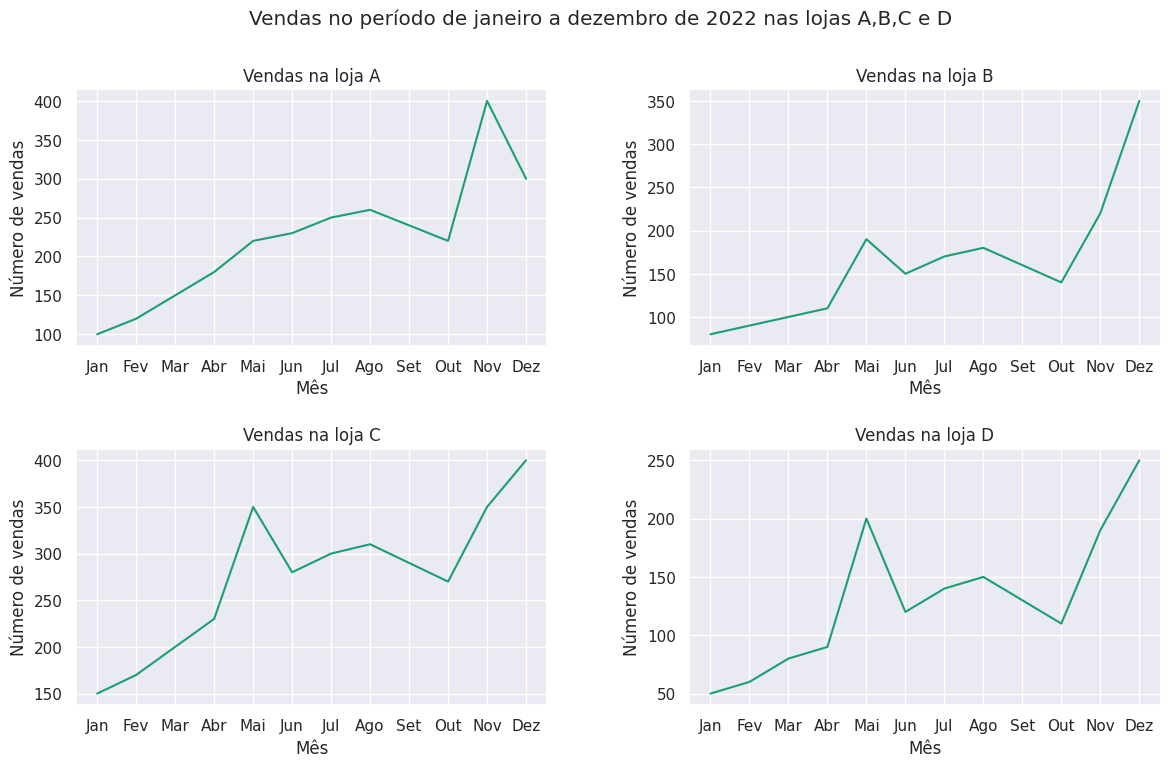

In [149]:
# criando o dataframe
dfloja = pd.DataFrame(vendas_2022, index=lojas)
# Criar a figura e os subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Ajustar os espaçamentos entre os subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Adicionando um título geral para os subplots
fig.suptitle('Vendas no período de janeiro a dezembro de 2022 nas lojas A,B,C e D')

# Adicionar os gráficos em cada um dos subplots
axs[0, 0].plot(dfloja.loc['A'])
axs[0, 0].set_title('Vendas na loja A')
axs[0, 1].plot(dfloja.loc['B'])
axs[0, 1].set_title('Vendas na loja B')
axs[1, 0].plot(dfloja.loc['C'])
axs[1, 0].set_title('Vendas na loja C')
axs[1, 1].plot(dfloja.loc['D'])
axs[1, 1].set_title('Vendas na loja D')

# Adicionando rótulos para os eixos X e Y
for ax in axs.flat:
    ax.set_xlabel('Mês')
    ax.set_ylabel('Número de vendas')

# Exibir a figura
plt.show()

Modificando o fráfico com a biblioteca Matplolib

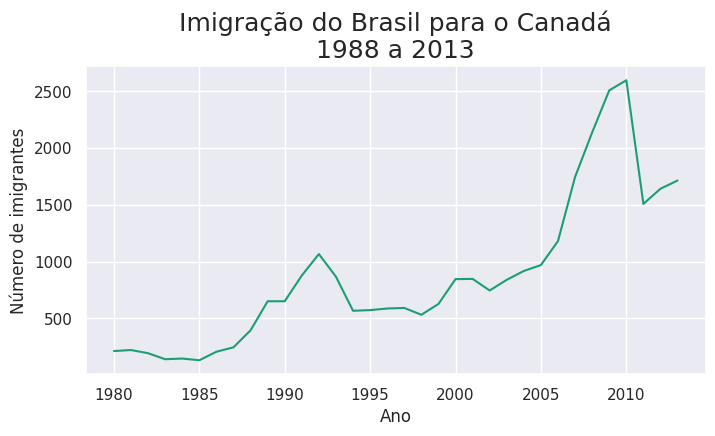

In [150]:
# Usando fontsize para alterar o tamanho da fonte
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

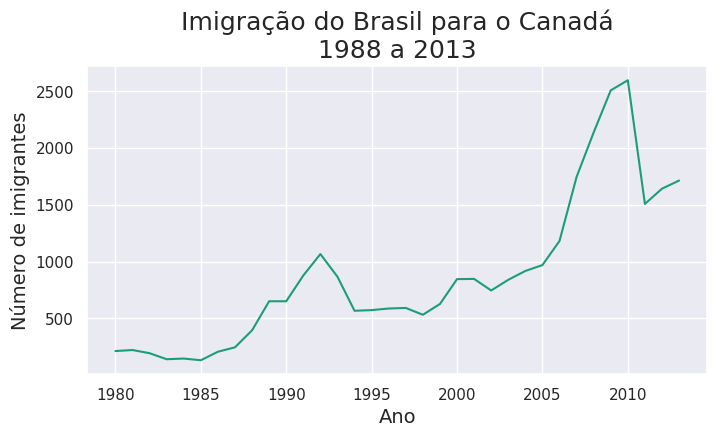

In [151]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

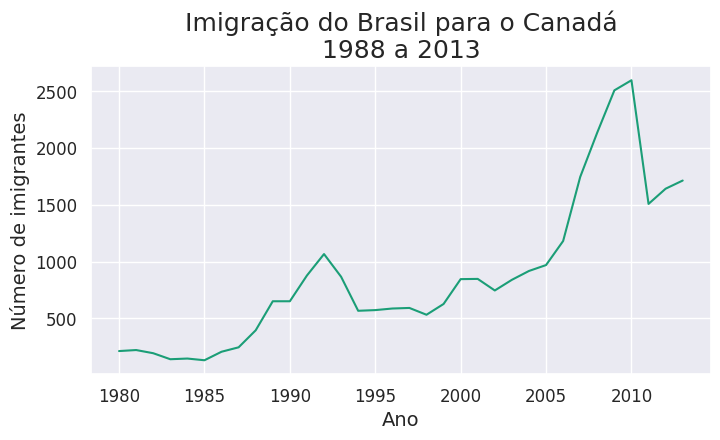

In [152]:
#alterando o tamanho dos números dos eixos
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

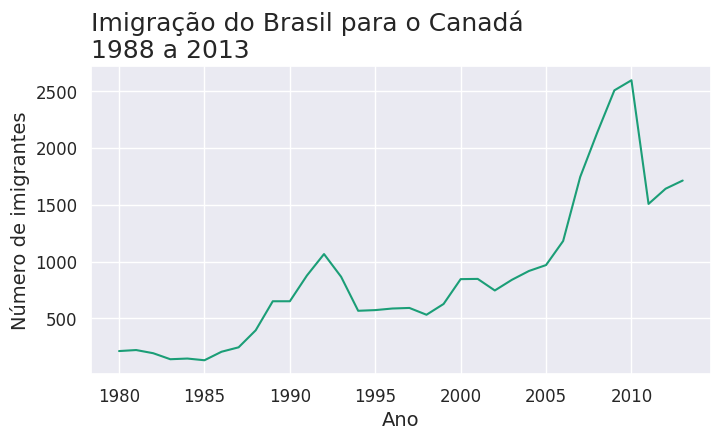

In [153]:
#alterando o alinhamento do título para esquerda
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18,loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

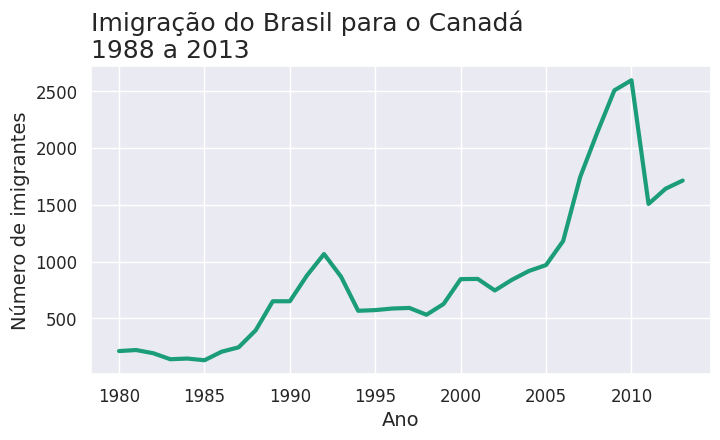

In [154]:
#alterando a largura do traço no gráfico
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'],lw=3)
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18,loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

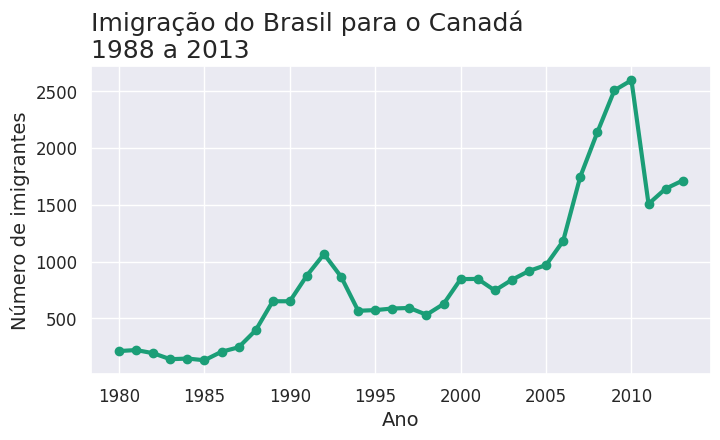

In [155]:
#adicionando marcadores na linha em formato de círculo
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'],lw=3,marker='o')
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18,loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

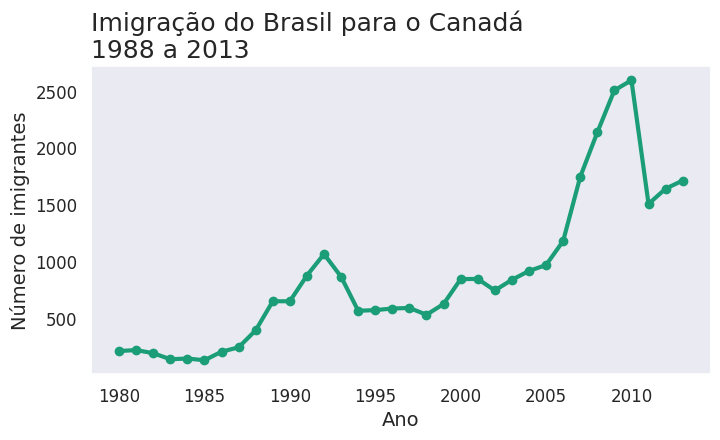

In [156]:
#adicionando grade ao gráfico
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'],lw=3,marker='o')
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18,loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid()
plt.show()

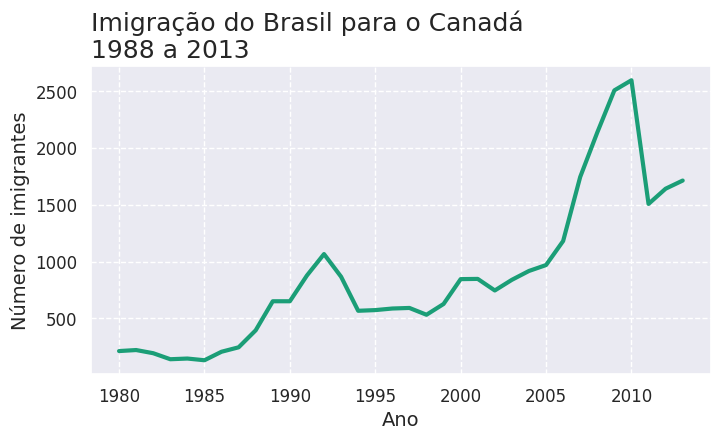

In [157]:
# deixando a grade mais suave
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'],lw=3,)
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18,loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--')
plt.show()

Para saber mais: alterando estilos
 Próxima Atividade

Nós personalizamos as visualizações no vídeo anterior, alterando o tamanho das fontes, mudando a posição do título e também adicionando elementos como marcadores e grades às figuras. Mas além disso, segundo a documentação da biblioteca Matplotlib podemos aplicar diferentes estilos para permitir que nós adaptemos as visualizações de acordo com as nossas necessidades. Para saber quais estilos estão disponíveis, podemos imprimir style.available, onde style é um submódulo da biblioteca Matplotlib utilizado para definir estilos de visualização:

In [158]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [159]:
IPython_default = plt.rcParams.copy()

In [160]:
plt.style.use('fivethirtyeight')

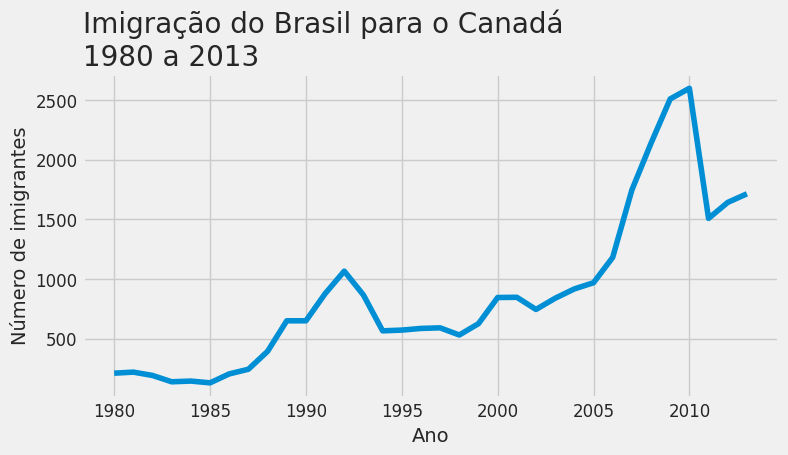

In [161]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=20, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

In [162]:
plt.rcParams.update(IPython_default);

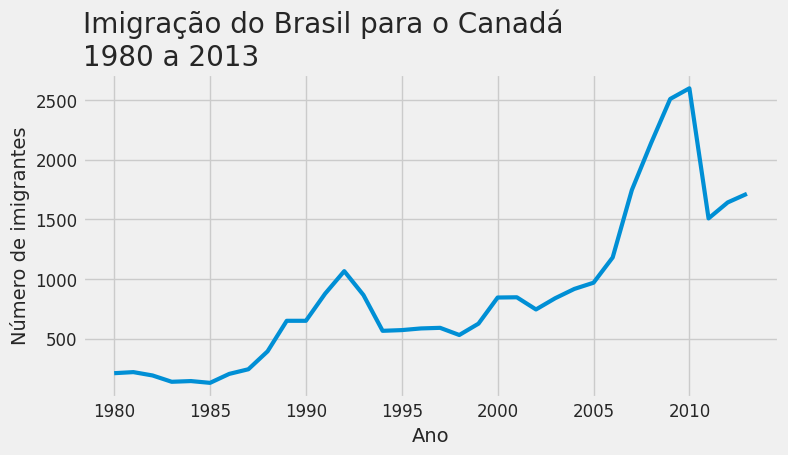

In [163]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
  ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=20, loc='left')
  ax.set_ylabel('Número de imigrantes', fontsize=14)
  ax.set_xlabel('Ano', fontsize=14)
  ax.yaxis.set_tick_params(labelsize=12)
  ax.xaxis.set_tick_params(labelsize=12)
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  plt.show()

# Alterando as cores #1

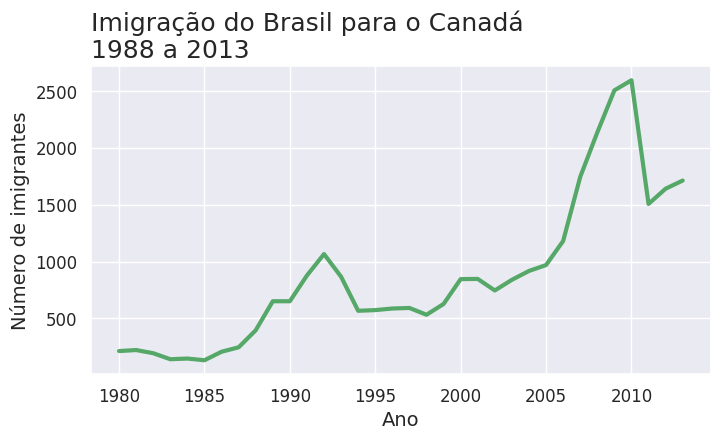

In [164]:
# alterando a cor da linha
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'],lw=3,color='g')
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18,loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

In [165]:
df.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


# Alterando as cores #1

In [166]:
america_sul = df.query('Região == "América do Sul"')
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


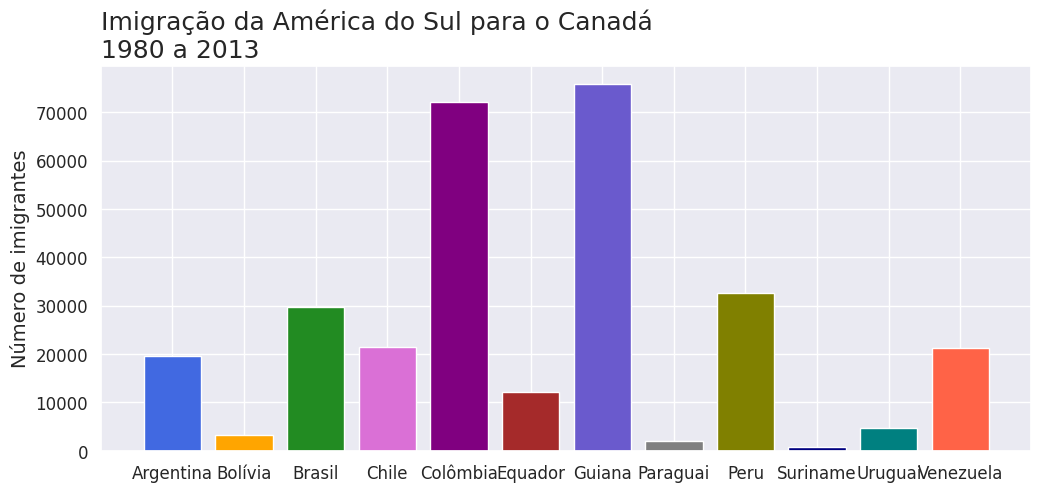

In [167]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(america_sul.index, america_sul['Total'],color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', fontsize=18,loc='left')
ax.set_xlabel('', )
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

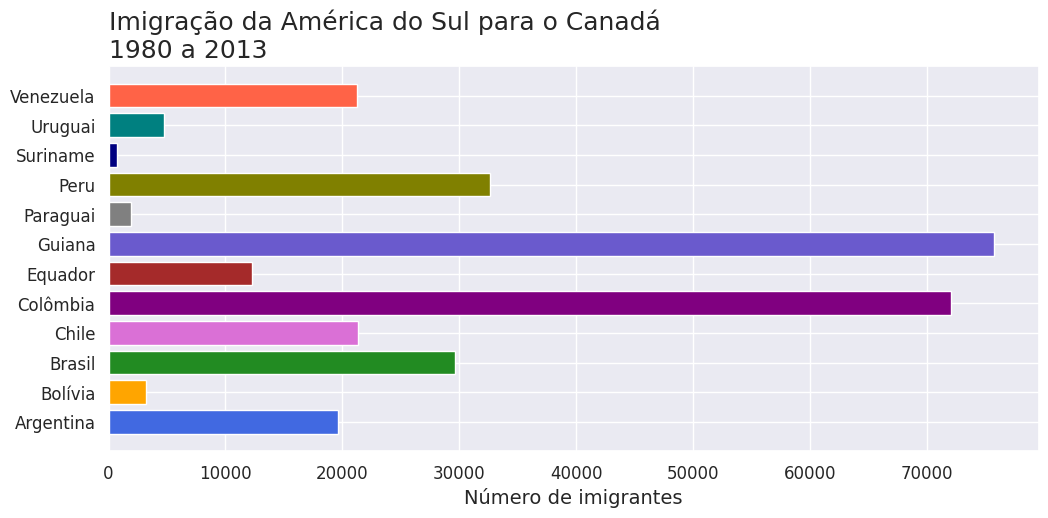

In [168]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul.index, america_sul['Total'], color=cores) # barh para gerar gráfico de barras ao invés de colunas
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14) # como invertemos o gráfico o eixo x será o do numeros de imigrantes por isso alteramos
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

In [169]:
# Criando ordenação pelos valores dos totais
america_sul.sort_values('Total', ascending=True)


,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Suriname,América Latina e o Caribe,América do Sul,15,10,21,12,5,16,7,46,...,15,16,20,9,12,13,11,16,4,739
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Uruguai,América Latina e o Caribe,América do Sul,128,132,146,105,90,92,137,269,...,217,175,147,160,99,93,81,47,58,4715
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Venezuela,América Latina e o Caribe,América do Sul,103,117,174,124,142,165,179,229,...,1211,1192,1335,1239,1353,998,1452,1373,1022,21267
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659


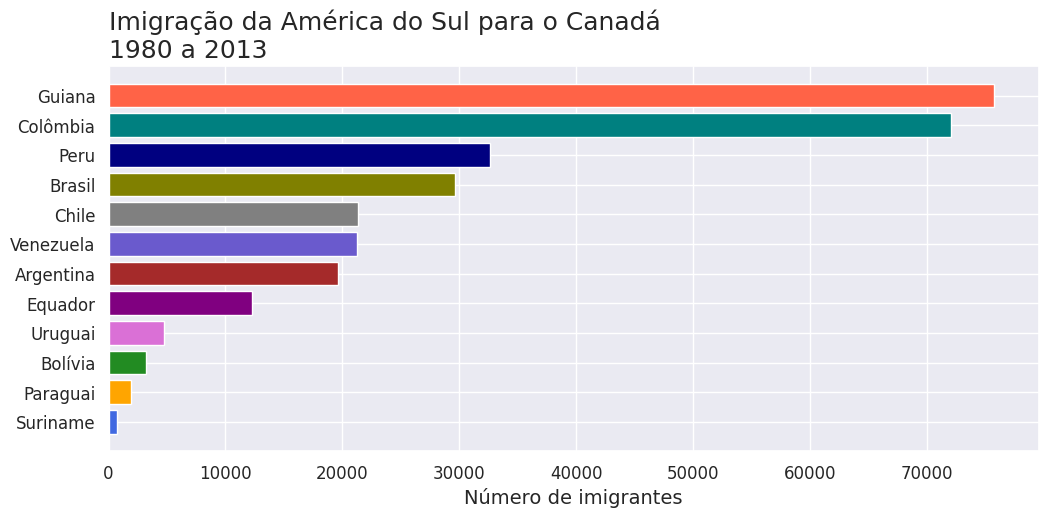

In [170]:
import matplotlib.pyplot as plt

# Ordenar o DataFrame pelos valores da coluna 'Total'
america_sul_ordenado = america_sul.sort_values('Total', ascending=True)

# Lista de cores (certifique-se de ter cores suficientes para o número de países)
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_ordenado.index, america_sul_ordenado['Total'], color=cores)

# Personalização
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Exibir o gráfico
plt.show()


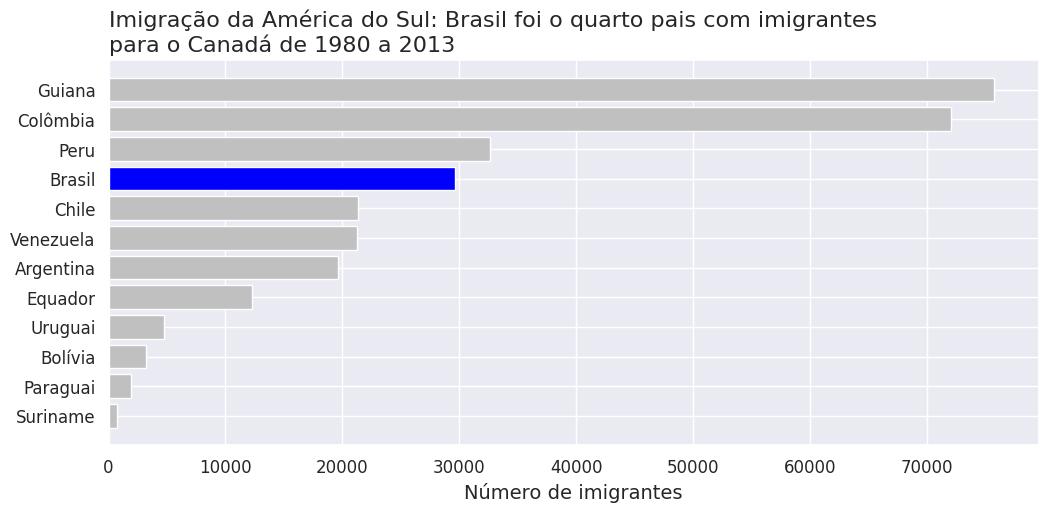

In [171]:
# para destacar o brasil

cores = []
for pais in america_sul_ordenado.index:
    if pais == 'Brasil':
        cores.append('blue')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_ordenado.index, america_sul_ordenado['Total'], color=cores)
ax.set_title('Imigração da América do Sul: Brasil foi o quarto pais com imigrantes\npara o Canadá de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

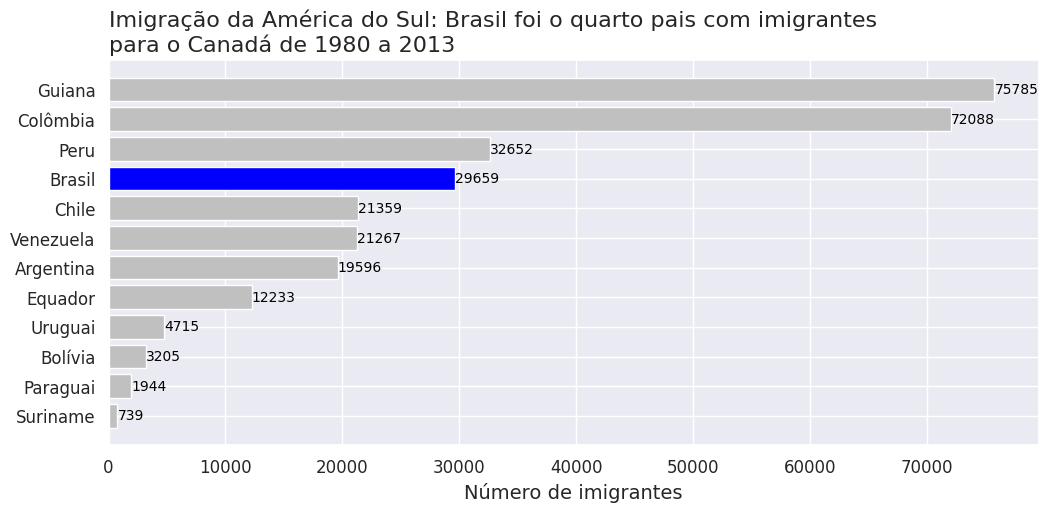

In [172]:
# para adicionar valores proximos das barras com os valores

cores = []
for pais in america_sul_ordenado.index:
    if pais == 'Brasil':
        cores.append('blue')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_ordenado.index, america_sul_ordenado['Total'], color=cores)
ax.set_title('Imigração da América do Sul: Brasil foi o quarto pais com imigrantes\npara o Canadá de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

#criando um for para variavel i
for i, v in enumerate(america_sul_ordenado['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10,ha='left',va='center')

plt.show()

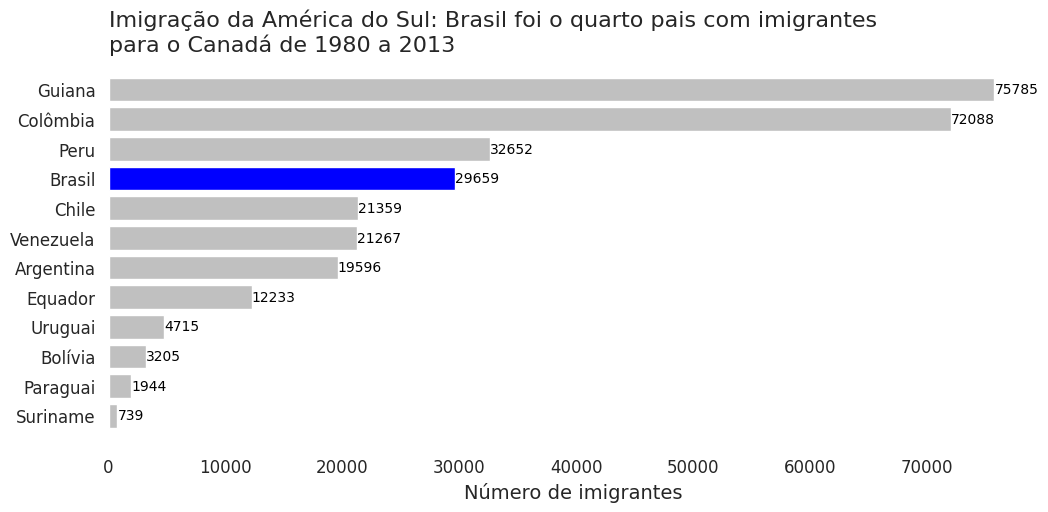

In [173]:
# para retirar o frame do grafico

cores = []
for pais in america_sul_ordenado.index:
    if pais == 'Brasil':
        cores.append('blue')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_ordenado.index, america_sul_ordenado['Total'], color=cores)
ax.set_title('Imigração da América do Sul: Brasil foi o quarto pais com imigrantes\npara o Canadá de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

#criando um for para variavel i
for i, v in enumerate(america_sul_ordenado['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10,ha='left',va='center')

ax.set_frame_on(False)

plt.show()

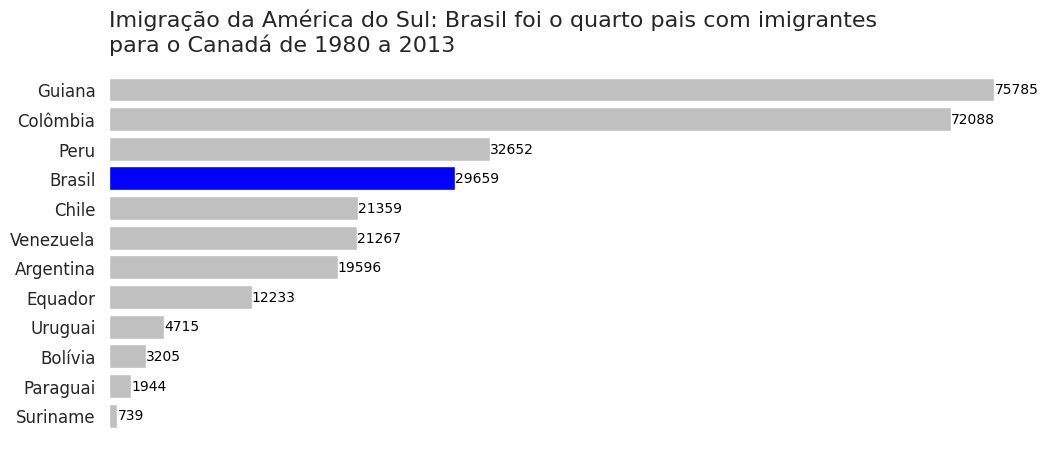

In [174]:
# para retirar os valores do eixo x. não foram retiradas mas na verdade estão ocultos

cores = []
for pais in america_sul_ordenado.index:
    if pais == 'Brasil':
        cores.append('blue')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_ordenado.index, america_sul_ordenado['Total'], color=cores)
ax.set_title('Imigração da América do Sul: Brasil foi o quarto pais com imigrantes\npara o Canadá de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

for i, v in enumerate(america_sul_ordenado['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10,ha='left',va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)

plt.show()

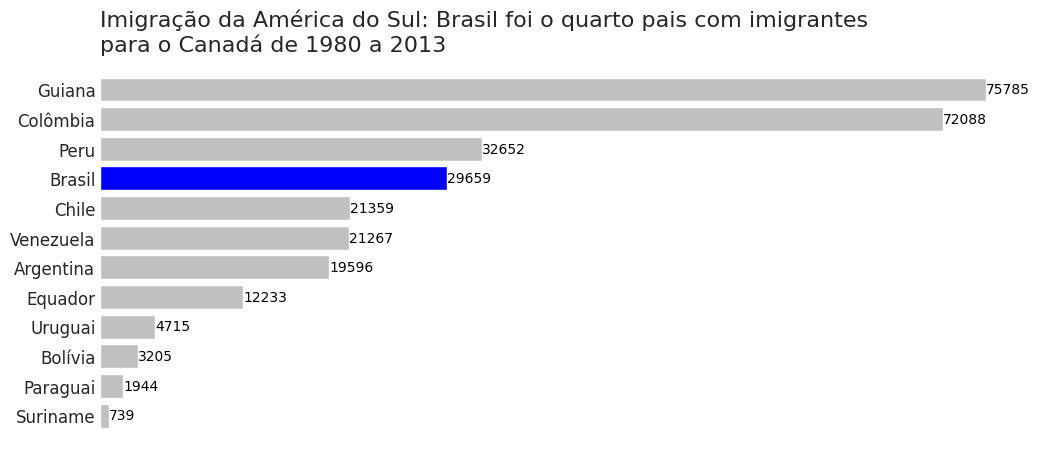

In [175]:
# para retirar os tickets dos eixos

cores = []
for pais in america_sul_ordenado.index:
    if pais == 'Brasil':
        cores.append('blue')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_ordenado.index, america_sul_ordenado['Total'], color=cores)
ax.set_title('Imigração da América do Sul: Brasil foi o quarto pais com imigrantes\npara o Canadá de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

for i, v in enumerate(america_sul_ordenado['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10,ha='left',va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both',which='both',length=0)

plt.show()

In [176]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


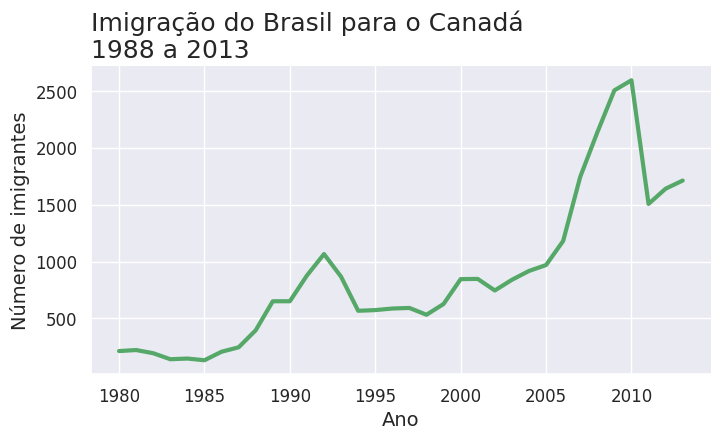

In [177]:
# para salvar o gráfico em formato png
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'],lw=3,color='g')
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18,loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.spines['top'].set_visible(False) # para retirar a borda do topo e embaixo
ax.spines['right'].set_visible(False) # para retirar a borda das laterais


fig.savefig('imigracao_brasil_canada.png',transparent=False, dpi=300, bbox_inches='tight')

plt.show()

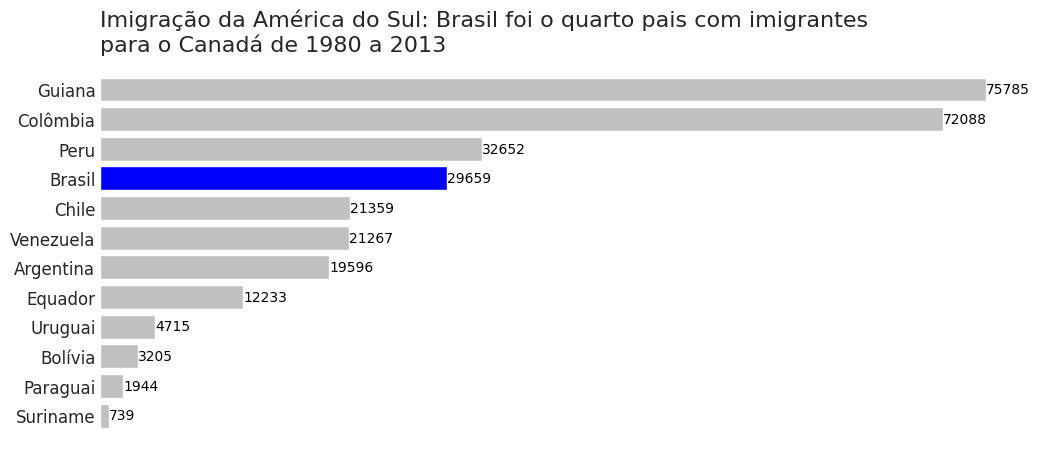

In [178]:
# para salvar

cores = []
for pais in america_sul_ordenado.index:
    if pais == 'Brasil':
        cores.append('blue')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_ordenado.index, america_sul_ordenado['Total'], color=cores)
ax.set_title('Imigração da América do Sul: Brasil foi o quarto pais com imigrantes\npara o Canadá de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

for i, v in enumerate(america_sul_ordenado['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10,ha='left',va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both',which='both',length=0)

fig.savefig('imigracao_america_sul.png',transparent=False, dpi=300, bbox_inches='tight')


plt.show()

# Desafio: customizando os subplots com dados de vendas de diferentes lojas

Mais uma etapa de desafio se inicia! Aproveite a oportunidade proposta e mergulhe nas possibilidades. Na aula anterior, você teve o desafio de criar uma figura com subplots que apresentam a variação no número de vendas em quatro diferentes lojas ao longo de um ano. Agora é o momento de elevar essa figura a um novo patamar! É a hora de personalizá-la! Nesta segunda parte do desafio, você deve explorar as opções de customização dos subplots para deixar a figura mais clara e atraente para a gerência da empresa.

Algumas ideias de customização que você pode explorar são:

Alterar a posição dos títulos dos subplots para esquerda.
Aumentar o tamanho da fonte do título geral da figura para destacá-lo.
Aumentar o tamanho dos títulos e rótulos dos eixos dos subplots.
Deixar as linhas com a espessura maior.
Alterar a cor das linhas de cada loja para diferenciá-las ainda mais.
Fique à vontade para testar mais customizações!

E mais uma dica: você pode reduzir o tamanho do código utilizando o comando for i, ax in enumerate(axs.flat): que permite um loop iterando sobre todos os subplots da figura. Dentro desse loop você pode passar as funções plot, set_title, set_xlabel, set_ylabel e etc…

Lembrando que os dados são os seguintes:


lojas = ['A', 'B', 'C', 'D']

vendas_2022 = {'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}

# Criando DataFrame
df = pd.DataFrame(vendas_2022, index=lojas)

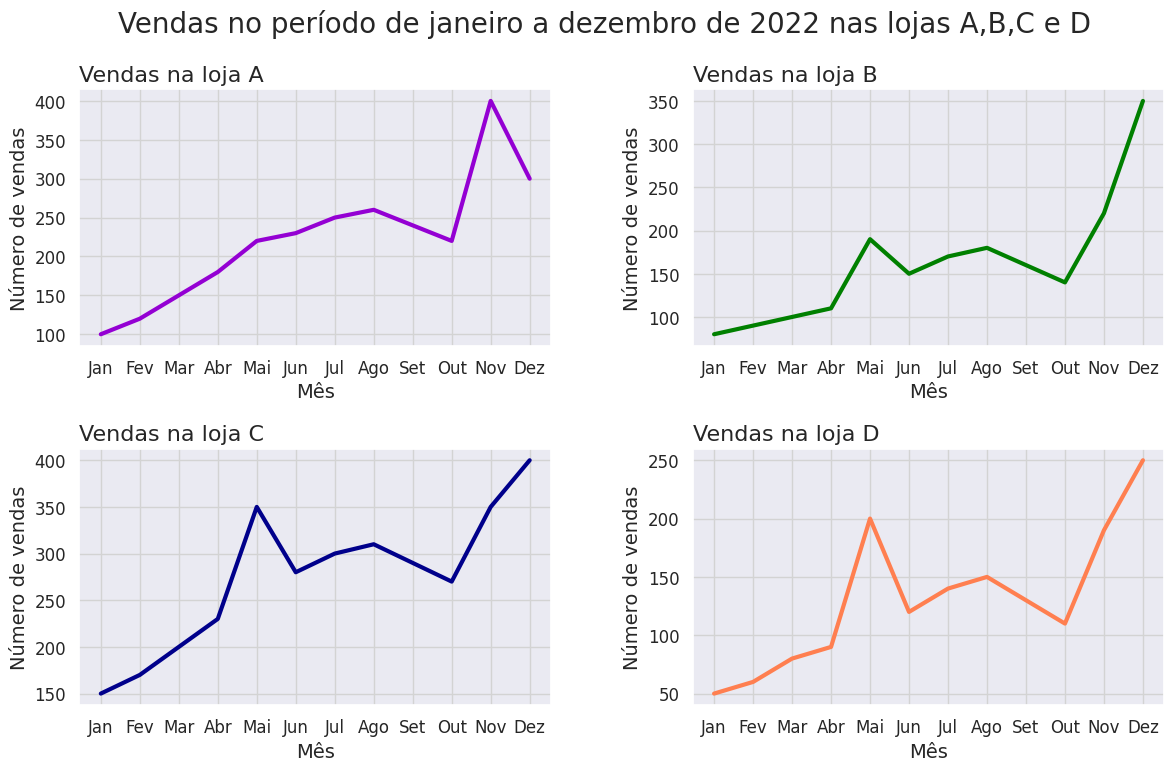

In [179]:
# Criar a figura e os subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Ajustar os espaçamentos entre os subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Adicionando um título geral para os subplots
fig.suptitle('Vendas no período de janeiro a dezembro de 2022 nas lojas A,B,C e D', fontsize=20)

# Lista de cores
cores = ['darkviolet', 'green', 'darkblue', 'coral']

# Loop para plotar e customizar os subplots
for i, ax in enumerate(axs.flat):
    loja = dfloja.iloc[i]  # pega a linha da loja i
    ax.plot(dfloja.columns, loja.values, color=cores[i], lw=3)
    ax.set_title(f'Vendas na loja {dfloja.index[i]}', loc='left', fontsize=16)
    ax.set_xlabel('Mês', fontsize=14)
    ax.set_ylabel('Número de vendas', fontsize=14)
    ax.tick_params(labelsize=12)
    ax.grid(color='lightgrey')


# Criando o primeiro gráfico com Seaborn

In [180]:
#importando a bilbioteca
import seaborn as sns

In [181]:
#selecionando um tema
sns.set_theme()

In [182]:
#criando um top 10 maiores paises que imigraram para canada
top_10 = df.sort_values('Total', ascending=False).head(10)

In [183]:
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


<Axes: xlabel='País', ylabel='Total'>

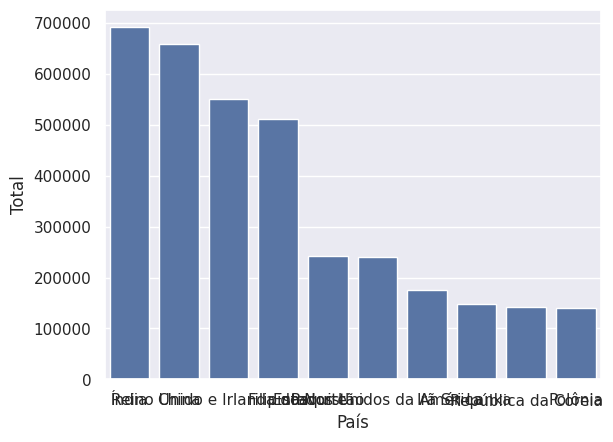

In [184]:
sns.barplot(data=top_10, x=top_10.index, y ='Total')

<Axes: xlabel='Total', ylabel='País'>

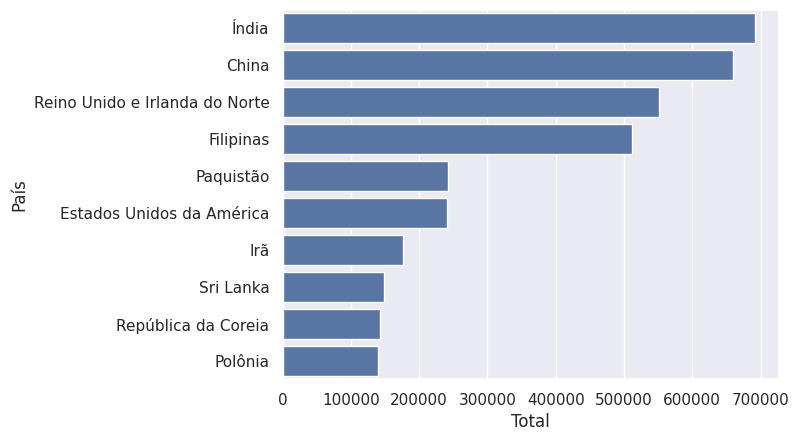

In [185]:
sns.barplot(data=top_10, y=top_10.index, x ='Total', orient='h')

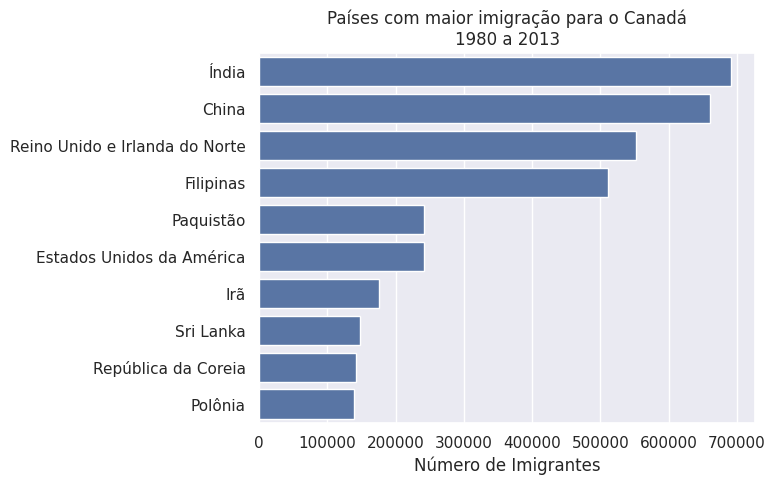

In [186]:
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

ax.set(title="Países com maior imigração para o Canadá\n1980 a 2013",
       xlabel='Número de Imigrantes',
       ylabel='')
plt.show()

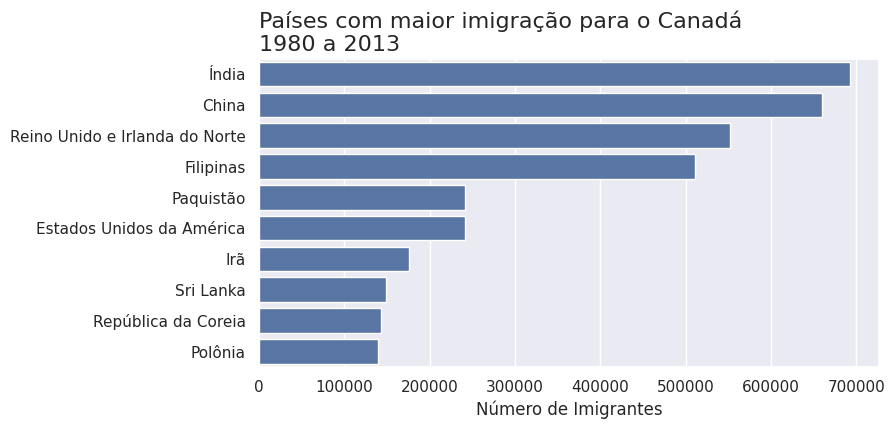

In [187]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

ax.set_title("Países com maior imigração para o Canadá\n1980 a 2013", loc='left', fontsize=16)
ax.set_xlabel('Número de Imigrantes')
ax.set_ylabel('')
plt.show()

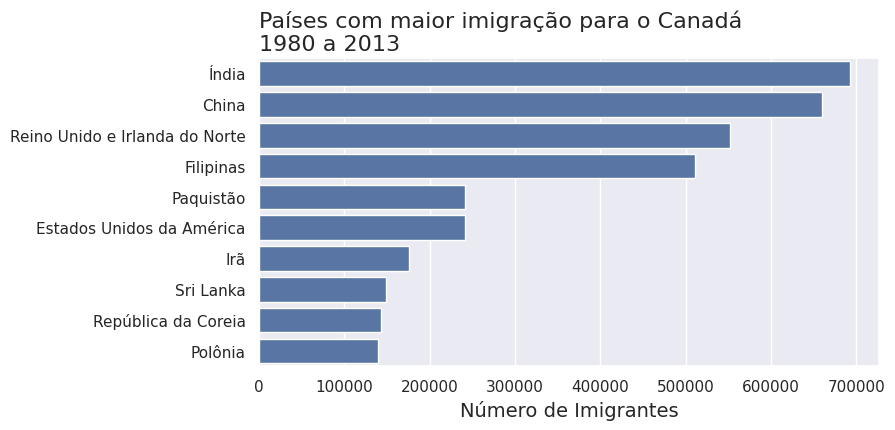

In [188]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

ax.set_title("Países com maior imigração para o Canadá\n1980 a 2013", loc='left', fontsize=16)
ax.set_xlabel('Número de Imigrantes',fontsize=14)
ax.set_ylabel('')
plt.show()

In [189]:
def gerar_grafico_paleta(palette):
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)
    ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=18)
    ax.set_xlabel('Número de imigrantes', fontsize=14)
    ax.set_ylabel('')
    plt.show()

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




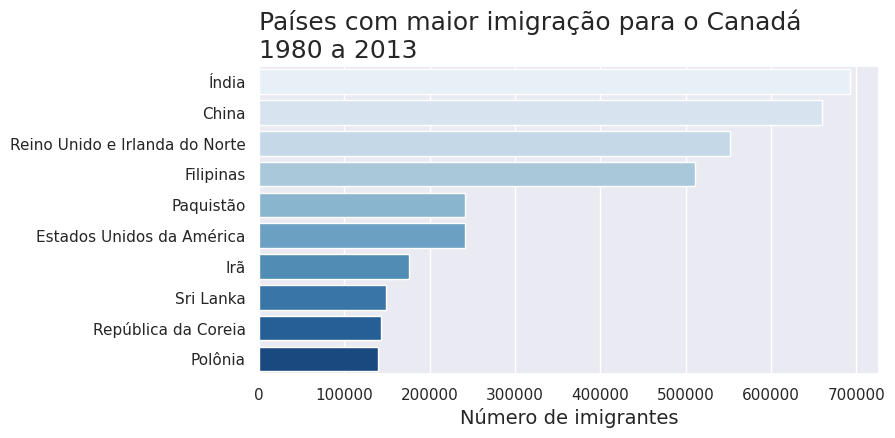

In [190]:
gerar_grafico_paleta('Blues')

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




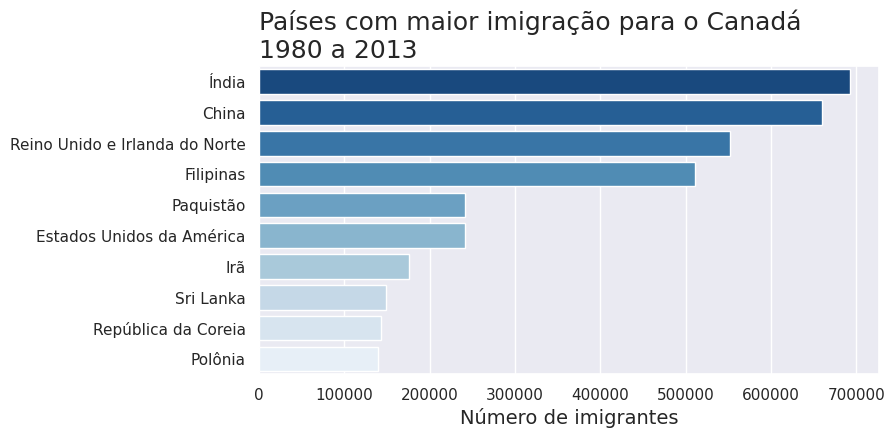

In [191]:
#invertendo o gradiente
gerar_grafico_paleta('Blues_r')

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




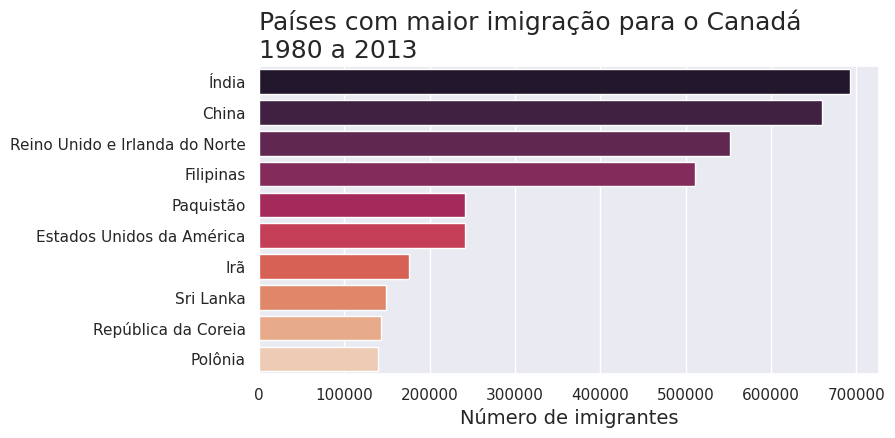

In [192]:
gerar_grafico_paleta('rocket')

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




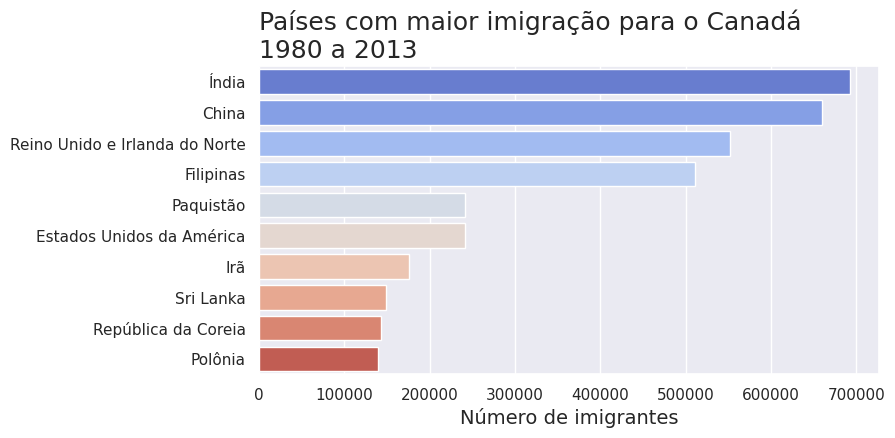

In [193]:
gerar_grafico_paleta('coolwarm')

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




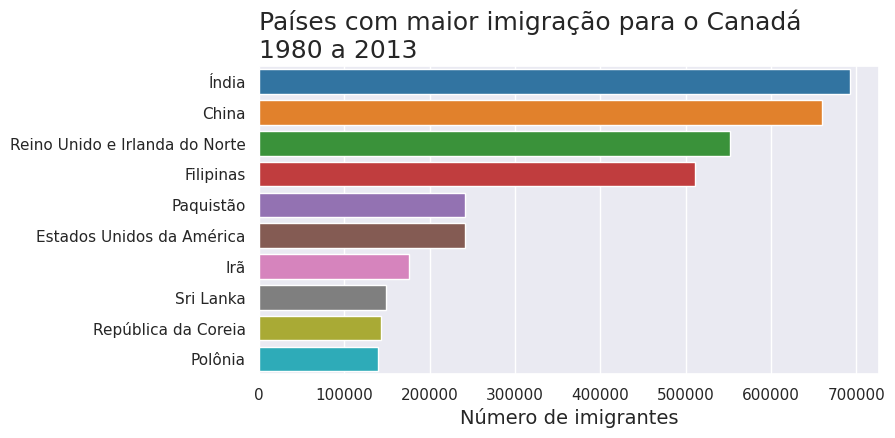

In [194]:
gerar_grafico_paleta("tab10")

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




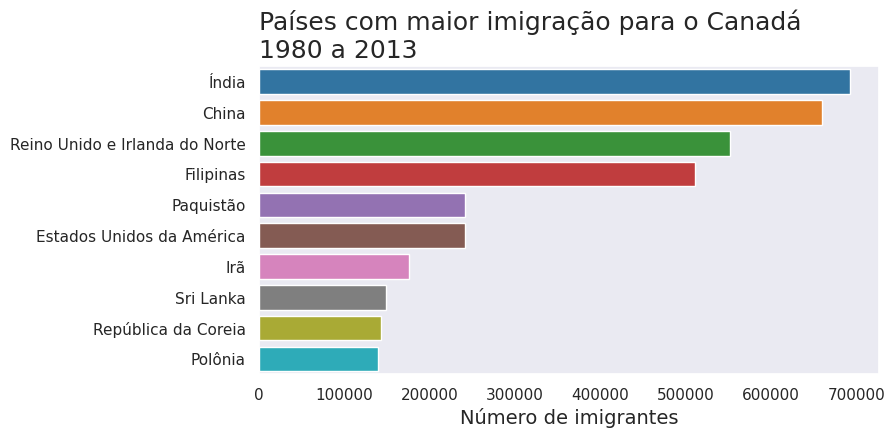

In [195]:
sns.set_theme(style='dark')
gerar_grafico_paleta("tab10")

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




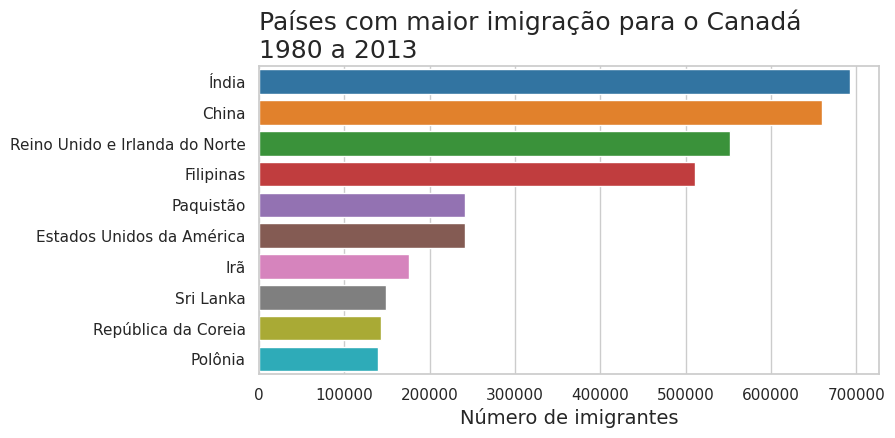

In [196]:
sns.set_theme(style='whitegrid')
gerar_grafico_paleta("tab10")

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




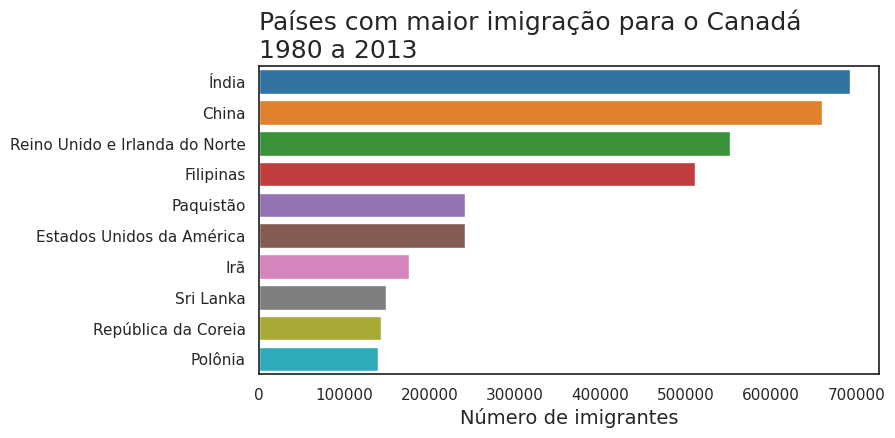

In [197]:
sns.set_theme(style='white')
gerar_grafico_paleta("tab10")

<ipython-input-189-a460d809f5f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




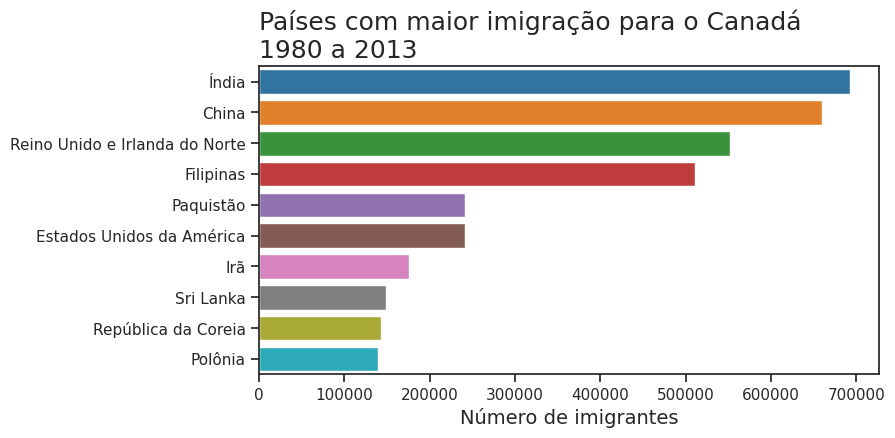

In [198]:
sns.set_theme(style='ticks')
gerar_grafico_paleta('tab10')

<ipython-input-199-bc0f92760004>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




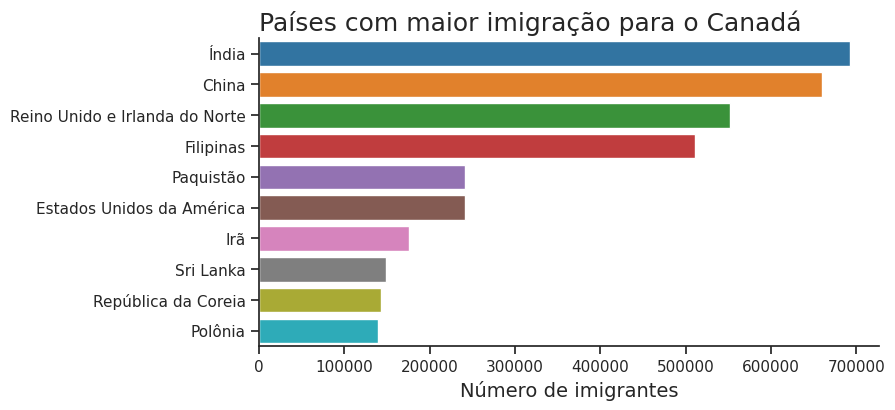

In [199]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')

ax.set_title('Países com maior imigração para o Canadá', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
sns.despine()

plt.show()

 Desafio: criando um gráfico de linhas com a biblioteca Seaborn

Nesta etapa, seu desafio é criar uma figura contendo as tendências de imigração dos 4 maiores países da América latina: Brasil, Argentina, Peru e Colômbia. Através dessa criação você pode explorar diversas possibilidades e reconhecer de forma atrativa o seu processo de desenvolvimento.E não nos esqueçamos das orientações! Essa figura precisa ter uma linha para cada país, título, rótulos nos eixos, cores apropriadas, um tema da biblioteca Seaborn e legenda. Por isso, pense nas questões de acessibilidade, como tamanho das fontes e espessura das linhas. É importante escolher cores adequadas que não causem cansaço visual ou dificultem a leitura das informações. Além disso, o tamanho das fontes deve ser legível o suficiente para que as pessoas possam interpretar os dados com facilidade.

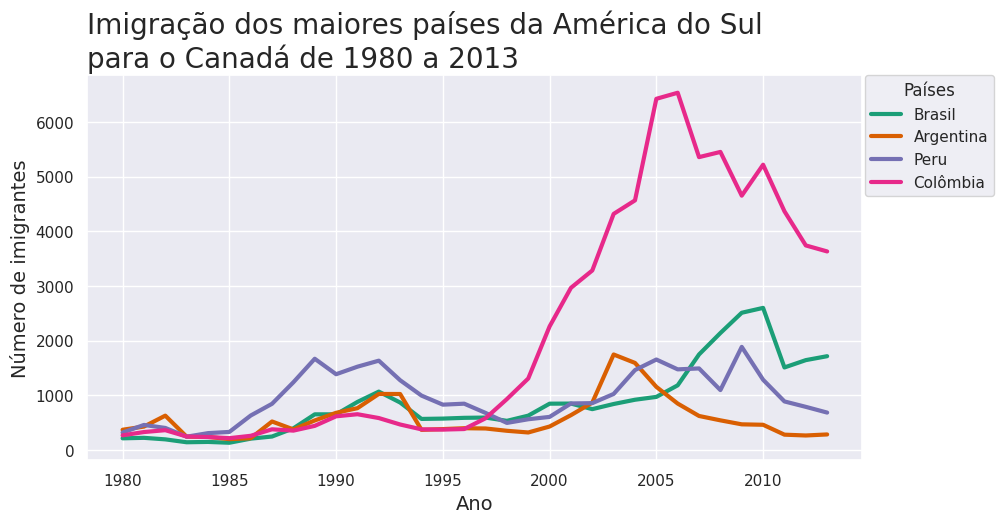

In [200]:
sns.set_theme()
sns.set_palette('Dark2')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(df.loc['Brasil', anos], label='Brasil', lw=3)
ax = sns.lineplot(df.loc['Argentina', anos], label='Argentina', lw=3)
ax = sns.lineplot(df.loc['Peru', anos], label='Peru', lw=3)
ax = sns.lineplot(df.loc['Colômbia', anos], label='Colômbia', lw=3)

ax.set_title('Imigração dos maiores países da América do Sul\npara o Canadá de 1980 a 2013', loc='left', fontsize=20)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.18, 1.02))

plt.show()

In [201]:
import plotly.express as px

In [202]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')
fig.show()

In [203]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_traces(line_color='green',line_width=4) # alterando a cor e largura da linha
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')
fig.show()

In [204]:
america_sul.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [205]:
df_america_sul_clean = america_sul.drop(['Continente','Região','Total',],axis=1)
america_sul_final = df_america_sul_clean.T

In [206]:
america_sul_final.head()

País,Argentina,Bolívia,Brasil,Chile,Colômbia,Equador,Guiana,Paraguai,Peru,Suriname,Uruguai,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142


In [207]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País',
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

In [208]:
#adicionando marcadores
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País',
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013', markers=True)
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

# Salvando gráficos em HTML

In [209]:
fig.write_html('imigracao_america_sul.html')

# Para saber mais: animando gráficos para mostrar mudanças ao longo do tempo

Nós aprendemos como criar gráficos interativos com a biblioteca Plotly, porém você sabia que é possível ir além e criar animações com essa mesma biblioteca? Além de tornar nossos gráficos mais interativos, as animações podem trazer ainda mais dinamismo e criatividade para as nossas visualizações.

Para ilustrar essa ideia, dê uma olhada na captura de tela de um notebook onde criei uma animação com os dados de imigração do Brasil para o Canadá. O código que gera essa animação começa exibindo a figura sem nenhuma linha. Ao clicar no botão "Play", no canto superior esquerdo da figura, a linha começa a surgir no primeiro tick do eixo X, que corresponde ao ano 1980, e vai se movendo até chegar ao final do eixo X, mostrando a evolução dos dados ao longo do tempo:

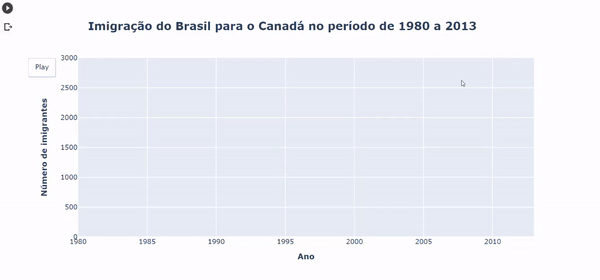

Captura da tela do Google Colab mostrando a figura gerada com a biblioteca Plotly com animação.

Com isso, podemos notar que a animação é uma ótima maneira de visualizar dados em evolução ao longo do tempo.

Você pode estar se perguntando: como podemos criar uma animação como essa? Fique tranquilo(a), estou aqui para te mostrar o caminho. Vou te explicar passo a passo!

1 - A primeira etapa após obter o DataFrame apenas com os dados do Brasil, como fizemos no começo do curso, é mudar o tipo de dados da coluna que contém os anos para int ao invés de manter como strings:

Com isso, podemos notar que a animação é uma ótima maneira de visualizar dados em evolução ao longo do tempo.

Você pode estar se perguntando: como podemos criar uma animação como essa? Fique tranquilo(a), estou aqui para te mostrar o caminho. Vou te explicar passo a passo!

1 - A primeira etapa após obter o DataFrame apenas com os dados do Brasil, como fizemos no começo do curso, é mudar o tipo de dados da coluna que contém os anos para int ao invés de manter como strings:
dados_brasil['ano'] = dados_brasil['ano'].astype(int)

2 - Depois disso, vamos criar um bloco de código onde vamos construir essa animação, importando plotly.graph_objs, um módulo da biblioteca Plotly que contém classes para criar visualizações de dados interativas e personalizadas.

import plotly.graph_objs as go

3 - Em seguida, uma figura vazia é criada usando a função go.Figure() e atribuída à variável fig.

fig = go.Figure()

4 - A seguir, uma linha é adicionada ao gráfico usando a função fig.add_trace(). Nesta função, é passado um objeto Scatter, que recebe como argumentos os dados para os eixos X e Y do gráfico. Para que o gráfico seja exibido sem linha antes de clicar no botão play usamos o iloc[0] nas duas variáveis. Isso ocorre porque o iloc[0] seleciona o primeiro valor das colunas ano e imigrantes dos dados do Brasil, respectivamente. Ao adicionar esse ponto de dados à visualização do gráfico, ele será exibido inicialmente como um único ponto, sem linhas que o conectem a outros pontos.Além disso, passamos o modo de exibição lines, que quer dizer linhas e o nome da linha. Também é definida a espessura da linha usando o dicionário line=dict(width=4).

fig.add_trace(
    go.Scatter(x=[dados_brasil['ano'].iloc[0]], y=[dados_brasil['imigrantes'].iloc[0]], mode='lines', name='Imigrantes', line=dict(width=4))
)

5 - Depois disso, o título do gráfico e as configurações do eixo X e Y são definidas usando a função fig.update_layout(). Os argumentos do título são:

text='<b>Imigração do Brasil para o Canadá no período de 1980 a 2013</b>': define o texto do título como uma string formatada em negrito (usando as tags HTML "<b>" e "</b>")
x=0.12: define a posição horizontal do título no layout, em relação à largura da figura. O valor 0.12 especifica que o título começará a 12% da largura da figura.
xanchor='left': define o alinhamento horizontal do título. O valor 'left' significa que o título será alinhado à esquerda do layout.
font=dict(size=20): define o tamanho do texto do título.
Já Os argumentos para xaxis e yaxis são dicionários, com as seguintes propriedades:

range=[1980, 2013]: define o intervalo do eixo, ou seja, o menor e o maior valor que serão exibidos. Neste caso, o eixo x terá como menor valor 1980 e como maior valor 2013, enquanto o eixo y terá como menor valor 0 e como maior valor 3000.
autorange=False: define se os limites do eixo serão ajustados automaticamente (True) ou não (False). Neste caso, os limites não serão ajustados automaticamente.
title='<b>Ano</b>': define o título do eixo. Neste caso, o eixo x terá o título "Ano", que é formatado em negrito (usando as tags HTML "<b>" e "</b>").
title='<b>Número de imigrantes</b>': define o título do eixo. Neste caso, o eixo y terá o título "Número de imigrantes", que é formatado em negrito (usando as tags HTML "<b>" e "</b>").
fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil para o Canadá no período de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de imigrantes</b>'),

6 - É adicionado um botão "Play" para a animação usando o argumento updatemenus. Esse argumento é uma lista que define as opções de menu para a figura. O valor atribuído a essa lista é um dicionário, com as seguintes propriedades:

type='buttons': define que o menu será composto por botões.
showactive=False: define que nenhum botão estará ativo inicialmente.
buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}])]: define o botão que será exibido no menu. Este botão tem a etiqueta "Play" (ou seja, "tocar"), que é exibida no próprio botão. O método animate é usado para ativar a animação dos dados. O argumento args é uma lista que contém dois elementos: o primeiro elemento é None, indicando que nenhum trace (ou camada) do gráfico será afetado pela animação, e o segundo elemento é um dicionário que especifica os parâmetros da animação. O parâmetro frame define a duração de cada quadro da animação e a atualização de cada quadro. O parâmetro fromcurrent define se o quadro atual deve ser mantido ou se a animação deve ser iniciada do primeiro quadro.
 updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],

7- A largura e a altura do gráfico são definidas com os parâmetros width e height, respectivamente:

width=1000,
height=500

8 - Em seguida, as configurações de animação são definidas. A variável frames é uma lista de objetos Frame do Plotly, que contém as informações dos dados para cada quadro da animação. Cada quadro é representado por um objeto Frame que contém um único trace, que é um objeto Scatter. No caso deste código, cada Scatter representa um ponto no gráfico, onde X é o ano e Y é o número de imigrantes.

O loop for é usado para criar um objeto Frame para cada ano no conjunto de dados, até o último ano. O método iloc é usado para selecionar os valores do DataFrame dados_brasil a partir do índice 0 até o índice atual i+1, o que significa que cada quadro da animação adiciona um ponto adicional ao gráfico. A cada iteração, a lista frames é preenchida com um novo objeto Frame.

Por último, a lista frames é atribuída à propriedade frames do objeto Figure (fig) criado anteriormente. Isso permite que a animação seja exibida no gráfico quando o botão de controle de animação é pressionado. Cada frame contém os dados do gráfico para um determinado ano e é exibido em sequência quando o botão "Play" é clicado.

frames = [go.Frame(data=[go.Scatter(x=dados_brasil['ano'].iloc[:i+1], y=dados_brasil['imigrantes'].iloc[:i+1])]) for i in range(len(dados_brasil))]
fig.frames = frames

9 - Por fim, a função fig.show() é chamada para exibir o gráfico animado no notebook. Quando o botão "Play" é pressionado, o gráfico será animado, mostrando a imigração do Brasil para o Canadá no período de 1980 a 2013.

Temos o código completo abaixo:

In [217]:
import plotly.graph_objs as go

# Criando uma figura
fig = go.Figure()

# Adicionando a linha do gráfico e definindo a espessura da linha
fig.add_trace(
    go.Scatter(x=[dados_brasil['ano'].iloc[0]], y=[dados_brasil['imigrantes'].iloc[0]], mode='lines', name='Imigrantes', line=dict(width=4))
)

# Definindo as configurações de layout
fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil para o Canadá no período de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de imigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1000,
    height=500
)

# Definir as configurações de animação
frames = [go.Frame(data=[go.Scatter(x=dados_brasil['ano'].iloc[:i+1], y=dados_brasil['imigrantes'].iloc[:i+1])]) for i in range(len(dados_brasil))]
fig.frames = frames

# Mostrando a figura
fig.show()

In [211]:
fig.write_html('imigracao_america_sul_animado.html')

# Desafio: criando uma animação para comparar diferentes dados

In [213]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afeganistão to Zimbábue
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Continente  195 non-null    object
 1   Região      195 non-null    object
 2   1980        195 non-null    int64 
 3   1981        195 non-null    int64 
 4   1982        195 non-null    int64 
 5   1983        195 non-null    int64 
 6   1984        195 non-null    int64 
 7   1985        195 non-null    int64 
 8   1986        195 non-null    int64 
 9   1987        195 non-null    int64 
 10  1988        195 non-null    int64 
 11  1989        195 non-null    int64 
 12  1990        195 non-null    int64 
 13  1991        195 non-null    int64 
 14  1992        195 non-null    int64 
 15  1993        195 non-null    int64 
 16  1994        195 non-null    int64 
 17  1995        195 non-null    int64 
 18  1996        195 non-null    int64 
 19  1997        195 non-null    int64 
 20  

In [218]:
import pandas as pd

# 1. Selecionar apenas as linhas do Brasil e da Argentina
brasil = df.loc['Brasil']
argentina = df.loc['Argentina']

# 2. Selecionar só as colunas de anos (de 1980 a 2013)
anos = list(map(str, range(1980, 2014)))  # lista de strings: ['1980', ..., '2013']

# 3. Criar DataFrames com duas colunas: ano (int) e imigrantes
dados_brasil = pd.DataFrame({
    'ano': list(map(int, anos)),
    'imigrantes': brasil[anos].values
})

dados_argentina = pd.DataFrame({
    'ano': list(map(int, anos)),
    'imigrantes': argentina[anos].values
})


In [219]:
import plotly.graph_objs as go

# Criando a figura
fig = go.Figure()

# Primeiros pontos (ano inicial de cada país)
fig.add_trace(
    go.Scatter(x=[dados_brasil['ano'].iloc[0]], y=[dados_brasil['imigrantes'].iloc[0]],
               mode='lines', name='Imigrantes do Brasil', line=dict(width=4))
)

fig.add_trace(
    go.Scatter(x=[dados_argentina['ano'].iloc[0]], y=[dados_argentina['imigrantes'].iloc[0]],
               mode='lines', name='Imigrantes da Argentina', line=dict(width=4))
)

# Layout e botão de animação
fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil e da Argentina para o Canadá no período de 1980 a 2013</b>',
        x=0.1,
        font=dict(size=18)
    ),
    xaxis=dict(range=[1980, 2013], title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], title='<b>Número de imigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1200,
    height=600
)

# Criando os quadros da animação (um para cada ano)
frames = []
for i in range(len(dados_brasil)):
    frame_data = [
        go.Scatter(x=dados_brasil['ano'].iloc[:i+1], y=dados_brasil['imigrantes'].iloc[:i+1], mode='lines', line=dict(width=4)),
        go.Scatter(x=dados_argentina['ano'].iloc[:i+1], y=dados_argentina['imigrantes'].iloc[:i+1], mode='lines', line=dict(width=4))
    ]
    frames.append(go.Frame(data=frame_data))

fig.frames = frames

# Mostrar a figura
fig.show()
